#  Research on Default of Credit Card Clients

## Abstract

The over-issued credit cards to unqualified applicants may cause some cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit. The crisis could be a big challenge for both banks and cardholders. This research aims to predict customers’ credit risk and to reduce the damage and uncertainty. The secondary aim of this project is to find out if traditional Machine Learning methods outperform Neural Network classifiers and Deep Learning networks.

## Understanding the Methods

Let us first understand few terms before we jump to the process of object detection and comparing the models.

### 1. K-means clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:
The centroids of the K clusters, which can be used to label new data
Labels for the training data (each data point is assigned to a single cluster)
Rather than defining groups before looking at the data, clustering allows you to find and analyze the groups that have formed organically. 

### 2. Logistic regression

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). Like all regression analyses, the logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

### 3.Random Forest

Random Forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because its simplicity and the fact that it can be used for both classification and regression tasks. To say it in simple words: Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

### 4. Artificial Neural Network

Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input. The patterns they recognize are numerical, contained in vectors, into which all real-world data, be it images, sound, text or time series, must be translated.

Neural networks help us cluster and classify. You can think of them as a clustering and classification layer on top of the data you store and manage. They help to group unlabeled data according to similarities among the example inputs, and they classify data when they have a labeled dataset to train on.

Neural networks can also extract features that are fed to other algorithms for clustering and classification; so you can think of deep neural networks as components of larger machine-learning applications involving algorithms for reinforcement learning, classification and regression.

### 5. TensorFlow:

TensorFlow is an open source software library for high performance numerical computation. Its flexible architecture allows easy deployment of computation across a variety of platforms (CPUs, GPUs, TPUs), and from desktops to clusters of servers to mobile and edge devices

## Installation before Running the Code

### Install tensorflow in anaconda using the below command :

pip install tensorflow

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve as curves
from time import time
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing

In [2]:
dataset = pd.read_csv('UCI_Credit_Card.csv')

In [3]:
# Now lets see how the data looks like
pd.options.display.max_columns = None
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)


BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In [4]:
dataset.shape

(30000, 25)

It indicates that there are 30,000 entries with 25 columns.

In [5]:
# Check the object type of all the columns to see if there is not a object type mismatch in any column
print(dataset.dtypes)

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object


From the above output it is clear that there is no object type mismatch in any column.

In [6]:
# Check the number of Null entries in the data columnwise
dataset.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

## Data Visualization & Exploratory Data Analysis

We have already had a feel of the dataset in the first few cells, let's have a better one while also exploring some very basic techniques.

#### Categorical variables: That are SEX, MARRIAGE, EDUCATION.

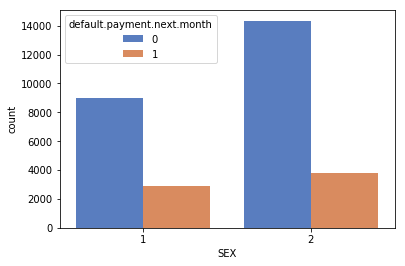

In [7]:
# Checking the number of counts of defaulters and non defaulters sexwise
g=sns.countplot(x="SEX", data=dataset,hue="default.payment.next.month", palette="muted")

It is evident from the above output that females have overall less default payments with respect to males.

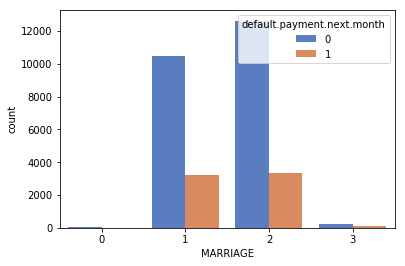

In [8]:
g=sns.countplot(x="MARRIAGE", data=dataset,hue="default.payment.next.month", palette="muted")

From the above plot it is clear that those people who have marital status single have less default payment with respect to married status people.

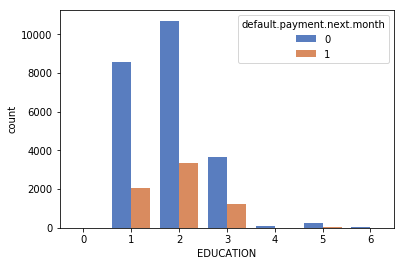

In [9]:
g=sns.countplot(x="EDUCATION", data=dataset,hue="default.payment.next.month", palette="muted")

According to the result above, people who have education status university have most default payment, then comes to the graduate school and high school.

## Feature Selection

### Finding Correlation:

In [10]:
from scipy import stats
# We will use Z-score function defined in scipy library to detect the outliers
z = np.abs(stats.zscore(dataset))
# Define a threshold to identify an outlier
threshold = 3
# Data without outliers
dataset = dataset[(z < threshold).all(axis=1)]
X = dataset.drop(['default.payment.next.month'],axis=1)
y = dataset['default.payment.next.month']

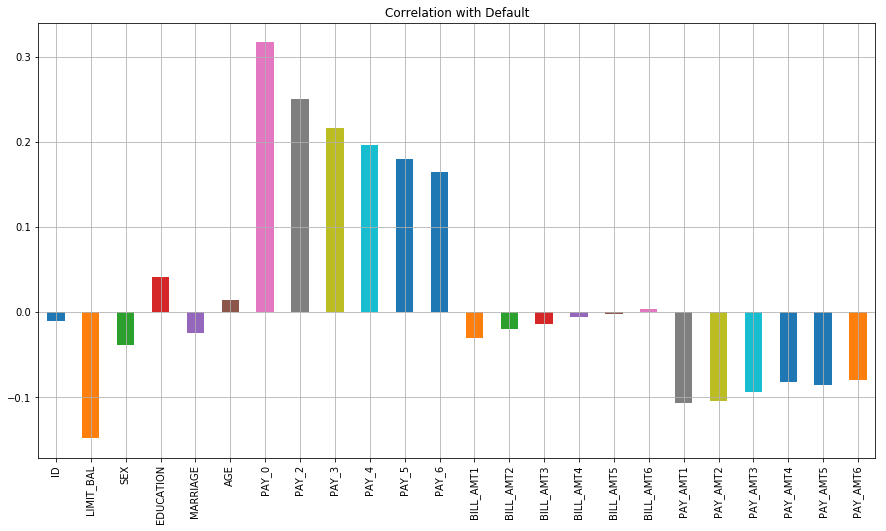

In [11]:
X.corrwith(dataset['default.payment.next.month']).plot.bar(
        figsize = (15, 8), title = "Correlation with Default", fontsize = 10, grid = True)

**It seems from the above graph is that most negatively correlated feature is LIMIT_BAL but we cannot blindly remove this feature because according to me it is very important feature for prediction.**

**ID is unimportant and it has no role in prediction so I will remove it now.**

In [12]:
dataset = dataset.drop(columns = ['ID'])
dataset2 = dataset.drop(columns = ['default.payment.next.month'])

In [13]:
sns.set(style="white")

# Compute the correlation matrix
corr = dataset2.corr()

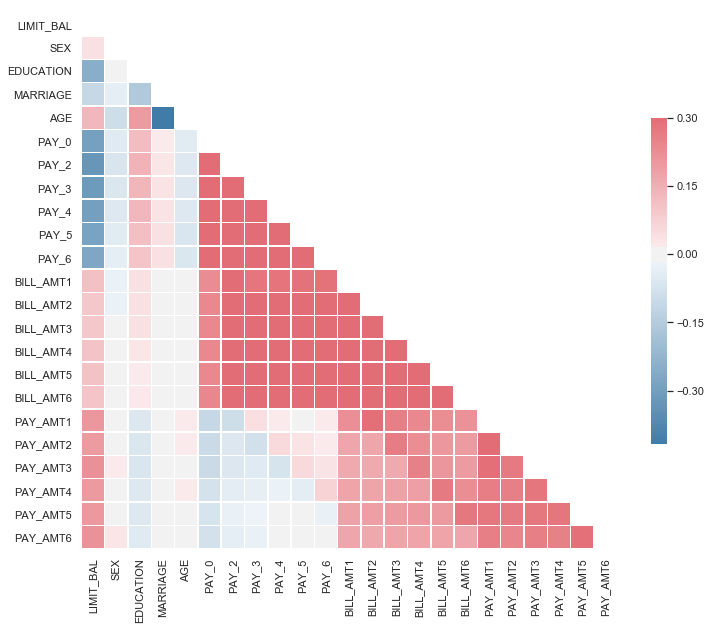

In [14]:
# Use a mask to plot the matrix since the columns are same with rows
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The heatmap above shows the correlation of all features.

## K-Means Clustering

In [15]:
# Use scaling data
from sklearn import preprocessing
npscale = preprocessing.scale(dataset)

In [16]:
# Use k-means from sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=10).fit(npscale)
df1 = pd.DataFrame(npscale)
df1['labels']=kmeans.labels_
df_count_type=df1.groupby('labels').apply(np.size)
# Amount of each cluster
df_count_type

labels
0    240875
1     98325
2    321525
dtype: int64

In [17]:
# Make the dimension-reduction for painting 
from sklearn.decomposition import PCA
new_df1=df1[:].reset_index()
pca = PCA(n_components=2)
new_pca1 = pd.DataFrame(pca.fit_transform(new_df1))
new_pca1.tail()

,0,1
26424,-13209.999994,-2.769947
26425,-13210.999970,4.946294
26426,-13212.000044,3.868725
26427,-13213.000000,-2.076756
26428,-13213.999991,0.508080


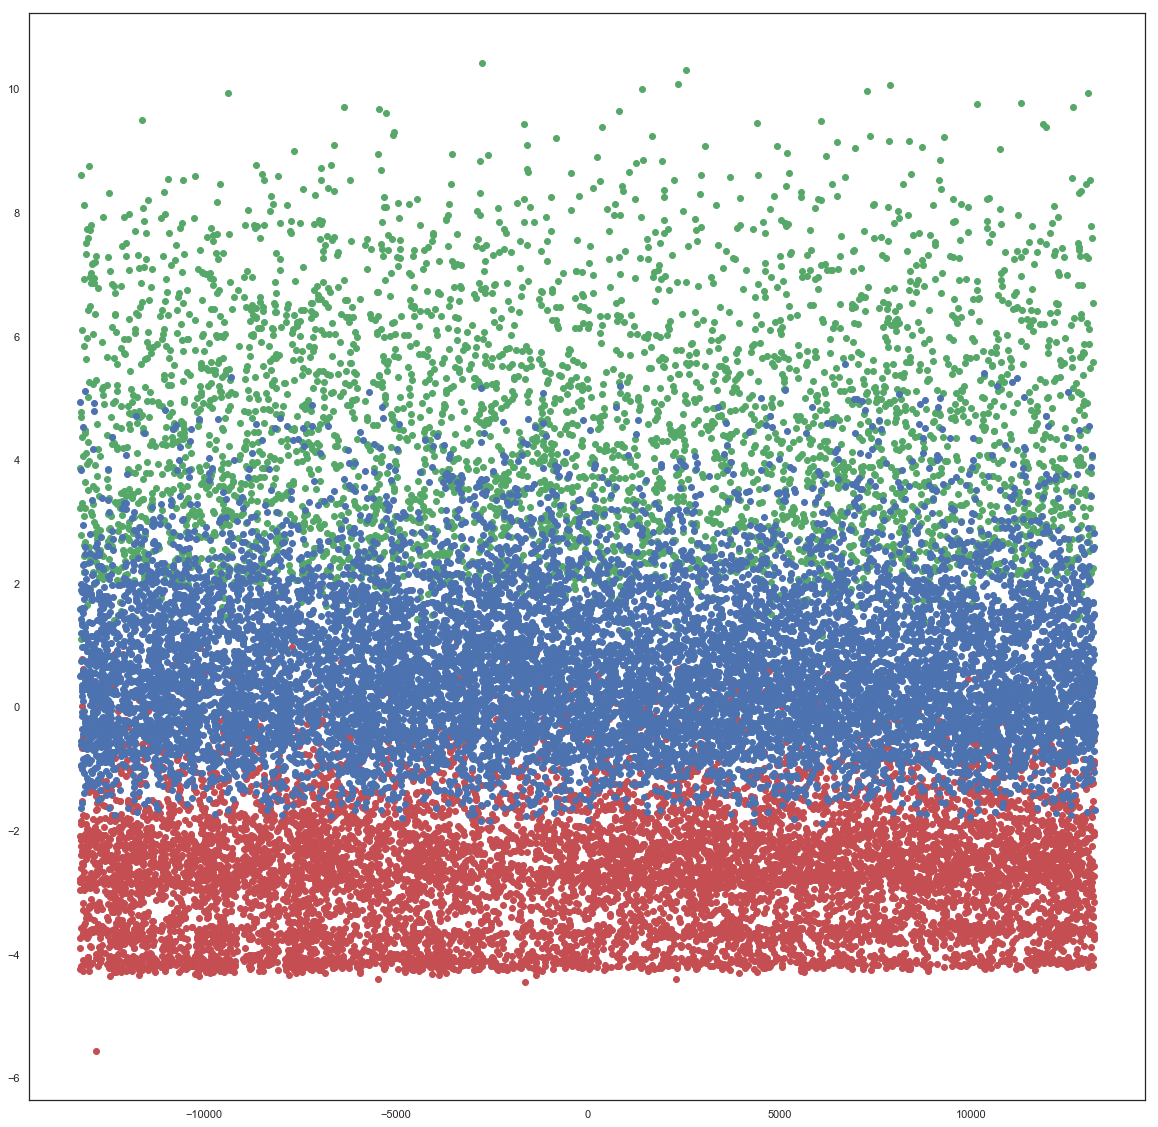

In [18]:
# Draw picture 
plt.rc('figure', figsize = (20, 20))
plt.rc('font', size = 15)
d = new_pca1[new_df1['labels'] == 0]
plt.plot(d[0], d[1], 'ro')
d = new_pca1[new_df1['labels'] == 1]
plt.plot(d[0], d[1], 'go')
d = new_pca1[new_df1['labels'] == 2]
plt.plot(d[0], d[1], 'bo')

plt.show()

**After clustering, we get 'labels' with 3 categories(red for 0, green for 1, blue for 2), then 'labels' could be used as a new feature. Therefore I'll add 'labels' to the dataset in the following steps.**

## Logistic Regression

In [19]:
# Add 'labels' to the dataset
data2 = dataset.copy()
data2['labels'] = df1.labels
data2 = data2.fillna(method='ffill')

In [20]:
data2.shape

(26429, 25)

In [21]:
# Add intercept manually
data2['intercept'] = 1.0
data2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,labels,intercept
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,2.0,1.0
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,2.0,1.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,2.0,1.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,2.0,1.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0.0,1.0


Now we get the new dataset, let's take a look at all features before prediction.

In [22]:
import statsmodels.api as sm
predictors = ['LIMIT_BAL','SEX', 'EDUCATION','MARRIAGE','AGE',
      'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
      'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
      'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','labels']
model = sm.Logit(data2['default.payment.next.month'],data2[predictors]).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.466136
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default.payment.next.month   No. Observations:                26429
Model:                                  Logit   Df Residuals:                    26405
Method:                                   MLE   Df Model:                           23
Date:                        Thu, 25 Apr 2019   Pseudo R-squ.:                  0.1248
Time:                                15:11:01   Log-Likelihood:                -12320.
converged:                               True   LL-Null:                       -14077.
                                                LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LIMIT_BAL  -4.992e-07    1.7e-07     -2.944      0.003   -8.32e-07   -1.67e-07
SEX           -0.1691      0.029     -5.924      0.000      -0.225      -0.113
EDUCATION     -0.1134      0.023     -4.885      0.000      -0.159      -0.068
MARRIAGE      -0.2377      0.025     -9.693      0.000      -0.286      -0.190
AGE            0.0018      0.001      1.219      0.223      -0.001       0.005
PAY_0          0.5750      0.019     30.693      0.000       0.538       0.612
PAY_2          0.1240      0.022      5.723      0.000       0.082       0.166
PAY_3          0.0592      0.025      2.408      0.016       0.011       0.107
PAY_4          0.0630      0.027      2.341      0.019       0.010       0.116
PAY_5          0.0216      0.029      0.744      0.457      -0.035       0.078
PAY_6          0.0001      0.024      0.006      0.995      -0.047       0.047
BILL_AMT1  -9.712e-06   1.65e-06     -5.873      0.000    -1.3e-05   -6.47e-06
BILL_AMT2   2.219e-06   2.29e-06      0.969      0.333   -2.27e-06    6.71e-06
BILL_AMT3   2.399e-06    2.1e-06      1.141      0.254   -1.72e-06    6.52e-06
BILL_AMT4   2.331e-06   2.08e-06      1.121      0.262   -1.74e-06    6.41e-06
BILL_AMT5  -4.487e-06    2.7e-06     -1.664      0.096   -9.77e-06    7.97e-07
BILL_AMT6   5.397e-06   2.23e-06      2.423      0.015    1.03e-06    9.76e-06
PAY_AMT1   -2.417e-05   4.71e-06     -5.134      0.000   -3.34e-05   -1.49e-05
PAY_AMT2   -2.931e-05   4.57e-06     -6.414      0.000   -3.83e-05   -2.04e-05
PAY_AMT3   -1.697e-05   4.41e-06     -3.848      0.000   -2.56e-05   -8.33e-06
PAY_AMT4   -9.058e-06   4.37e-06     -2.074      0.038   -1.76e-05   -4.98e-07
PAY_AMT5   -2.131e-05   4.84e-06     -4.401      0.000   -3.08e-05   -1.18e-05
PAY_AMT6   -9.276e-06   3.85e-06     -2.409      0.016   -1.68e-05   -1.73e-06
labels        -0.0171      0.017     -0.990      0.322      -0.051       0.017
==============================================================================
"""

According to the above chart, there are some features should be removed to prevent overfitting.

1. Check coefficient

'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' should be removed because the absolute values of their coefficient are too small.

2. Check P value

'AGE', 'PAY_5', 'PAY_6', 'labels' should be removed since their P values are greater than 0.05. **Here I notice that the new feature "labels" we got from k-means clustering can not be used as predictors.**

Finally, we have 7 predictors: 'SEX', 'EDUCATION','MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4'.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Use sklearn's LogisticRegression function
clf = LogisticRegression()
X2 = dataset[['SEX', 'EDUCATION','MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4']]
y2 = dataset[['default.payment.next.month']]
X2 = np.array(X2)
y2 = np.array(y2)
trainX,testX, trainy, testy = train_test_split(X2,y2,test_size=0.2, random_state=0)
clf.fit(trainX, trainy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
print ('The training accuracy of Logistic Regression is' ,clf.score(trainX, trainy))

The training accuracy of Logistic Regression is 0.8085891311545192


In [25]:
print ('The test accuracy of Logistic Regression is' ,clf.score(testX,testy))

The test accuracy of Logistic Regression is 0.8043889519485433


In [26]:
# Cross validation
from sklearn.model_selection import cross_val_score
acc = cross_val_score(clf, X2, y2.ravel( ), cv=10, scoring='accuracy').mean()
print('The test accuracy after cross validation is',acc)

The test accuracy after cross validation is 0.8080160383838308


## Random Forest

The important hyper-parameters are: criterion, max_depth, n_estimators, min_samples_leaf, random_state.

After several trying, the hyperparameters set of 'max_depth' = 6, 'n_estimators' = 10, and 'min_samples_leaf' = 50 performs the best in the cosideration of both prediction accuracy as well as time efficiency.

And we start testing the best working hyperparameters:

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

dtrf = RandomForestClassifier()
param_grid = {'criterion':['gini', 'entropy'], 'max_depth':[6], 'n_estimators':[10],
           'min_samples_leaf':[50]}
dtrfModel = GridSearchCV(dtrf, param_grid, cv = 10)
dtrfModel.fit(trainX, trainy.ravel())

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [6], 'n_estimators': [10], 'min_samples_leaf': [50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
# What hyper-parameter values work best
print(dtrfModel.best_params_)
print(dtrfModel.best_estimator_)

print('The best accuracy is',dtrfModel.best_score_)
print('The test accuracy is', dtrfModel.score(testX, testy))

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 50, 'n_estimators': 10}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
The best accuracy is 0.8176228538996358
The test accuracy is 0.8138479001135074


**Comparing with the Logistic Regression model in the previous, we are delighted to find out that the performance of the Random Forest model is better with a higher accuracy. (The test accuracy of Logistic Regression after cross validation is 0.8080160383838308)**

## Artificial Neural Network

In [29]:
# Split dataset into train & test group
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size = 0.2)
print(test.shape)
# Defined X & Y for fitting, also switch data type into model compileable format
train_x = train[['SEX', 'EDUCATION','MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4']]
train_y = train['default.payment.next.month']
train_x_a = train_x.values
train_y_a = train_y.values

test_x = test[['SEX', 'EDUCATION','MARRIAGE', 'PAY_0','PAY_2','PAY_3','PAY_4']]
test_y = test['default.payment.next.month']
test_x_a = test_x.values
test_y_a = test_y.values

(5286, 24)


In [30]:
# Set Y into onehot format so that rank are consistent when matmul Matrix
n_train_y = np.max(train_y_a) + 1
train_y_a = np.eye(n_train_y)[train_y_a]

n_test_y = np.max(test_y_a) + 1
test_y_a = np.eye(n_test_y)[test_y_a]

In [31]:
# Keep data type are consistent with the placeholder defined
train_x_a = train_x_a.astype(np.float32)
train_y_a = train_y_a.astype(np.float32)

test_x_a = test_x_a.astype(np.float32)
test_y_a = test_y_a.astype(np.float32)
train_x_a.shape

(21143, 7)

After the preparation of training set and test set, now let's implement a 3 layer ANN model. Here I start with 'relu' as 'activation' since it is the mostly used in ANN. Then I set 'dropout' as '0.1' to prevent overfitting.

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from keras.regularizers import l1,l2
import numpy
# Fix random seed for reproducibility
seed = 20190426
numpy.random.seed(seed)
# Load pima indians dataset
# Split into input (X) and output (Y) variables
# Create model
model = Sequential()
model.add(Dense(7, input_dim=7, activation='relu',kernel_regularizer=l2(0.01),activity_regularizer=l1(0.001)))
model.add(Dropout(0.1))
model.add(Dense(7, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.1))
# Output layer
model.add(Dense(2,  activation='softmax'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


The structure of this ANN model is shown as:

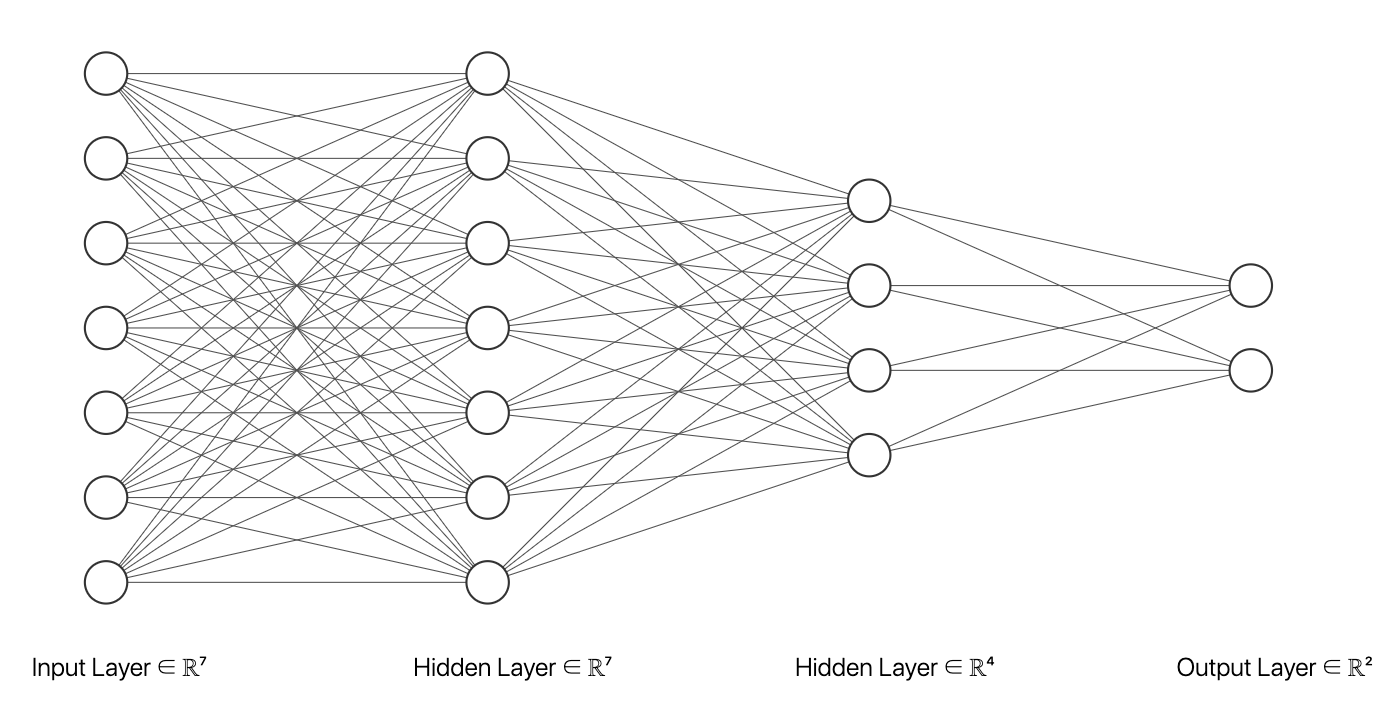

In [35]:
Image(filename='Structure.png')

Also, after several trying, the hyperparameters set of 'validation_split' = 0.2, 'epochs' = 20, and 'batch_size' = 100 performs the best in the cosideration of both prediction accuracy as well as time efficiency.

A smaller mini-batch size (not too small) usually leads not only to a smaller number of iterations of a training algorithm, than a large batch size, but also to a higher accuracy overall, i.e, a neural network that performs better, in the same amount of training time, or less.

Instructions for updating:
Use tf.cast instead.
Train on 16914 samples, validate on 4229 samples
Epoch 1/20
16914/16914 [==============================] - 1s 76us/step - loss: 0.8970 - acc: 0.6413 - val_loss: 0.6782 - val_acc: 0.7737
Epoch 2/20
16914/16914 [==============================] - 0s 28us/step - loss: 0.6007 - acc: 0.7746 - val_loss: 0.5515 - val_acc: 0.7737
Epoch 3/20
16914/16914 [==============================] - 0s 29us/step - loss: 0.5309 - acc: 0.7853 - val_loss: 0.5008 - val_acc: 0.8047
Epoch 4/20
16914/16914 [==============================] - 1s 34us/step - loss: 0.5052 - acc: 0.7983 - val_loss: 0.4894 - val_acc: 0.8037
Epoch 5/20
16914/16914 [==============================] - 0s 29us/step - loss: 0.5015 - acc: 0.7971 - val_loss: 0.4849 - val_acc: 0.8094
Epoch 6/20
16914/16914 [==============================] - 1s 32us/step - loss: 0.4960 - acc: 0.8007 - val_loss: 0.4832 - val_acc: 0.8087
Epoch 7/20
16914/16914 [==============================] - 1s 33us/step - loss: 0.

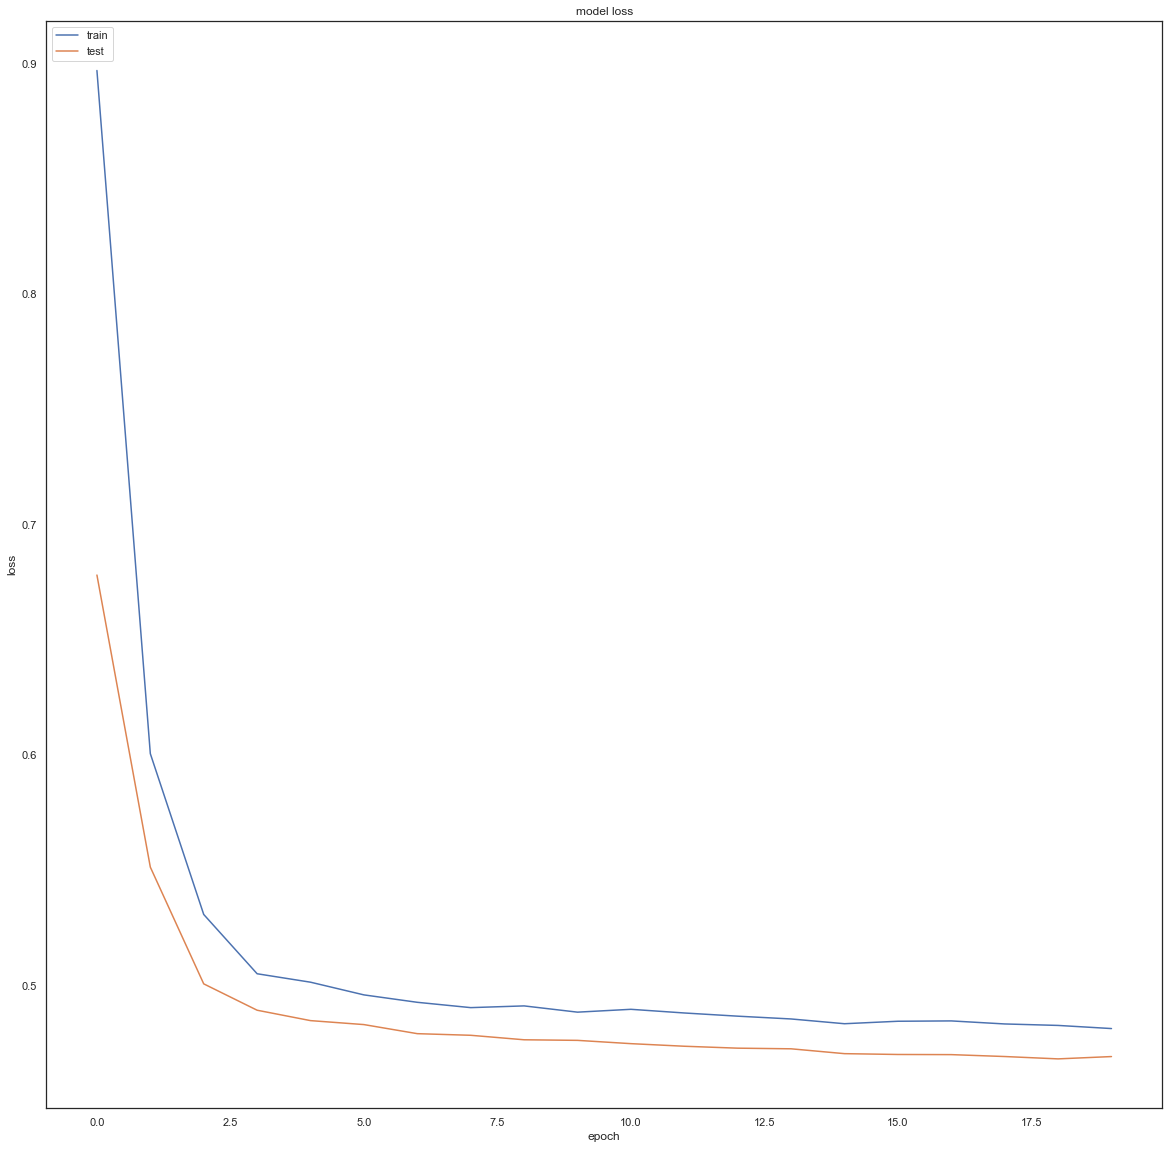

In [33]:
history = model.fit(train_x_a, train_y_a, validation_split=0.2, epochs=20, batch_size=100, verbose=1)
# List all data in history
print(history.history.keys())
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
score, acc = model.evaluate(test_x_a, test_y_a,
                            batch_size=100)
print('Test score:', score)
print('Test accuracy:', acc)

5286/5286 [==============================] - 0s 10us/step
Test score: 0.46156567083675215
Test accuracy: 0.8200908046620297


The results obtained suggest that the performance of Artificial Neural Network model performs similar with Random Forest model. If you run the code for several times, you would find that the accuracy values of these two models are hard to compare which one is better.

## Conclusion

In this case, from our experiments, we can conclude that traditional machine learning algorithms such as Logistic Regression and Random Forest aid in less efficient classification of data compared to Deep Learning Neural Networks. There are several possibilities for this outcome which will be discussed in this section. 

However, often there is not enough time and/or money to test and optimize every algorithm in order to its quality in a specific context. On the other hand, particular weaknesses of an approach can lead to avoid a specific algorithm in a specific context. In these cases, a decision about an algorithm has to be made before starting the project.

## Contributions

- By own: 85%
- By external source: 15%

## Citations

Use a mask to plot only part of a matrix: https://seaborn.pydata.org/generated/seaborn.heatmap.html

K-means Clustering :https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Keras: https://keras.io/getting-started/sequential-model-guide/

##  License

Copyright 2019 Wanxin Chen

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.